In [1]:
from src.DeepRock.models import AdvSeg
from src.DeepRock.data import DataGenerator
from src.DeepRock.utils import split_trn_vld_tst
import matplotlib.pyplot as plt
import numpy as np

C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_path = './data/train/'
sag_dtype = 'sent_ast_geo'
sa_dtype = 'sent_ast'
s_dtype = 'sent'
scale = 1.

#### load X-Y samples from block1, and split into train and test sets

In [3]:
X_trn, Y_trn, X_vld, Y_vld, X_tst, Y_tst = split_trn_vld_tst(data_path, vld_rate=0.2, tst_rate=0, seed=10)

split into 877 train, 219 validation, 0 test samples


#### visualize images and labels (check!)

Text(0.5,1,'label image')

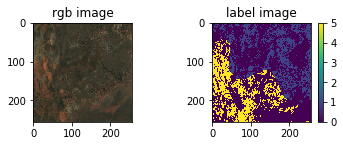

In [7]:
idx = 140
img = np.load(X_trn[idx])
lbl = np.load(Y_trn[idx])

img_rgb = np.transpose(img, [1,2,0])[:,:,::-1][:,:,-3:]
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('rgb image')
plt.subplot(222)
plt.imshow(np.argmax(lbl, axis=0))
plt.colorbar()
plt.title('label image')

#### start to build and train Conv2D

In [8]:
s_conv = AdvSeg(dtype=s_dtype)
sa_conv = AdvSeg(dtype=sa_dtype)
sag_conv = AdvSeg(dtype=sag_dtype)
# build Conv2D
# conv.build_AdvSegNet(adv_lr=1e-5, seg_lr=1e-3, verbose=True)

# now the tensorboard event file is saved in ./logs
# the training process, graph and statistics can be
# visualize by tensorboard

In [9]:
s_conv.build_SegmentationNet()
sa_conv.build_SegmentationNet()
sag_conv.build_SegmentationNet()

building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...
building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...
building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...


In [13]:
trn_data = DataGenerator(X_trn, Y_trn, batch_size=16, dtype=sag_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)
vld_data = DataGenerator(X_vld, Y_vld, batch_size=16, dtype=sag_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)

#### check data generator

Text(0.5,1,'label')

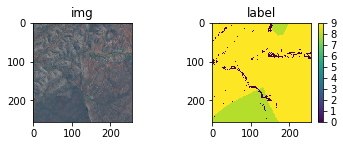

In [22]:
x, y = trn_data.getitem(5)
idx = 4
plt.subplot(221)
plt.imshow(x[idx,:,:,:][:,:,::-1][:,:,-3:])
plt.title('img')
plt.subplot(222)
plt.imshow(np.argmax(y[idx,:,:,:], axis=-1))
plt.colorbar()
plt.title('label')

In [ ]:
sag_conv.fit_model_generator(trn_data, vld_data, seg_epochs=200, seg_steps_per_epoch=None)

fitting model Segmentation
Epoch 1/200
 9/54 [====>.........................] - ETA: 27:58 - loss: 1.9565 - acc: 0.3199

In [ ]:
sa_trn_data = DataGenerator(X_trn, Y_trn, batch_size=16, dtype=sa_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)
sa_vld_data = DataGenerator(X_vld, Y_vld, batch_size=16, dtype=sa_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)

In [ ]:
sa_conv.fit_model_generator(sa_trn_data, sa_vld_data, seg_epochs=200, seg_steps_per_epoch=None)

In [ ]:
s_trn_data = DataGenerator(X_trn, Y_trn, batch_size=16, dtype=s_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)
s_vld_data = DataGenerator(X_vld, Y_vld, batch_size=16, dtype=s_dtype, intype=sag_conv.model_type, pred_fn=sag_conv.predict)

In [ ]:
s_conv.fit_model_generator(s_trn_data, s_vld_data, seg_epochs=200, seg_steps_per_epoch=None)

#### predict on test data

In [9]:
sg_conv.load_weights('./Segmentor/sent_geo/weights-85-0.62.hdf5')
s_conv.load_weights('./Segmentor/sent/weights-92-0.55.hdf5')

In [68]:
s_tst_data.shuffle = False
sg_tst_data.shuffle = False
s_tst_X = s_tst_data.getitem(0)[0]
sg_tst_X = sg_tst_data.getitem(0)[0]

In [69]:
s_tst_true = s_tst_data.getitem(0)[1]

In [70]:
sg_tst_true = sg_tst_data.getitem(0)[1]

In [71]:
s_preds = s_conv.predict(s_tst_X)
sg_preds = sg_conv.predict(sg_tst_X)

#### TO DO ####

#### visualize predicted Y

In [100]:
def plot_pg(idx, preds, tst_true):
    _pred = np.argmax(preds[idx,:,:,:], axis=2)
    _tst = np.argmax(tst_true[idx,:,:,:], axis=2)
    plt.subplot(221)
    plt.imshow(_tst)
    plt.colorbar()
    plt.title('ground truth')
    plt.subplot(222)
    plt.imshow(_pred)
    plt.colorbar()
    plt.title('prediction')
    plt.show()

0


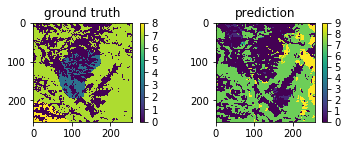

1


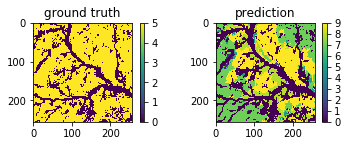

2


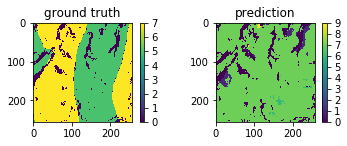

3


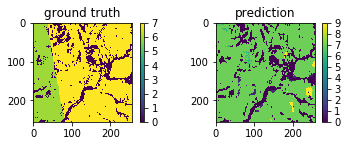

4


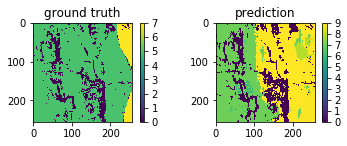

5


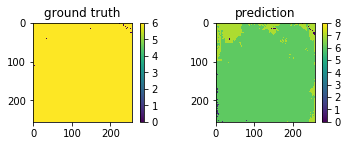

6


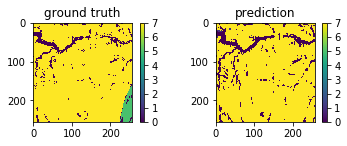

7


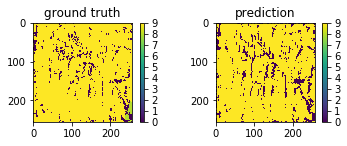

8


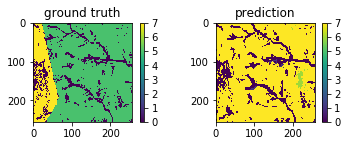

9


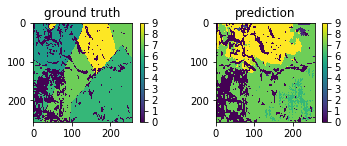

10


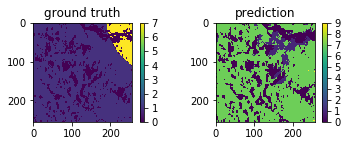

11


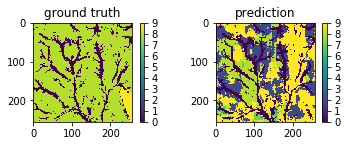

12


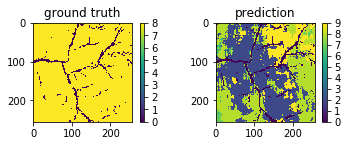

13


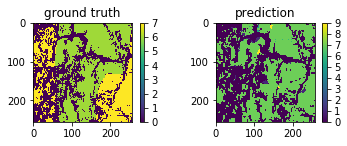

14


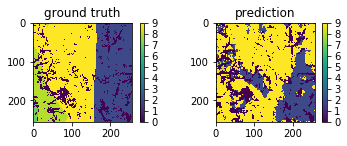

15


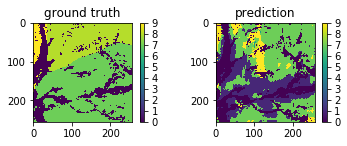

16


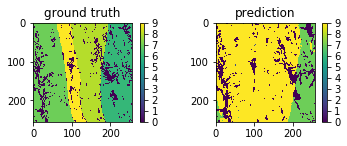

17


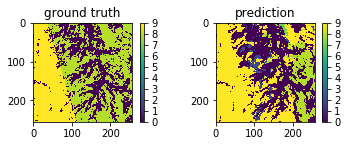

18


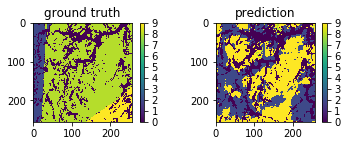

19


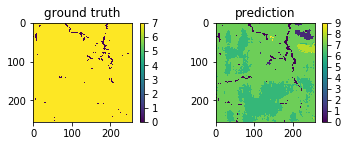

20


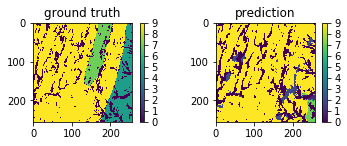

21


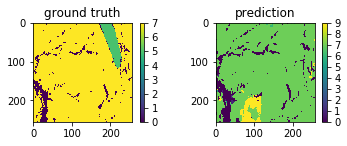

22


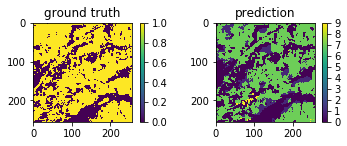

23


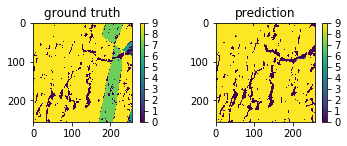

24


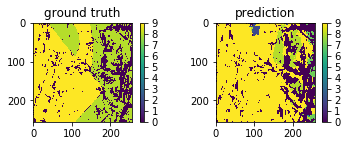

25


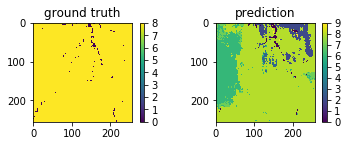

26


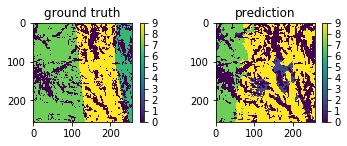

27


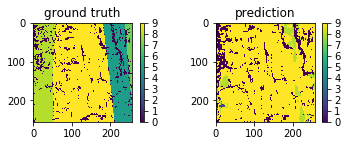

28


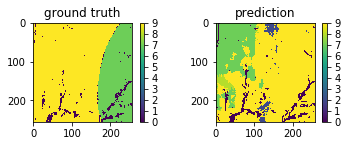

29


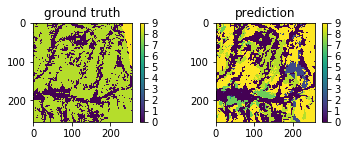

30


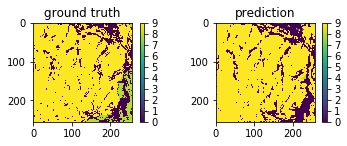

31


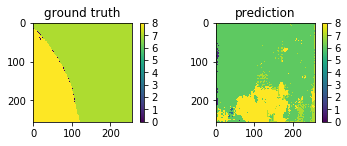

32


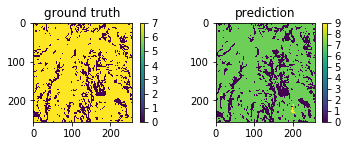

33


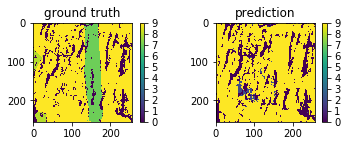

34


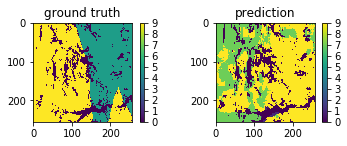

35


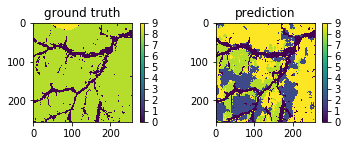

36


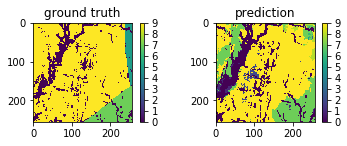

37


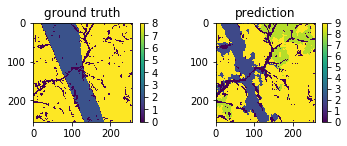

38


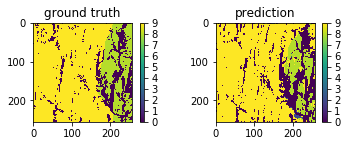

39


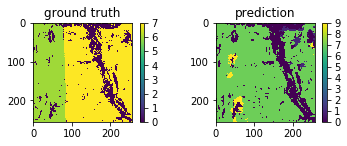

40


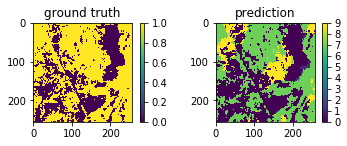

41


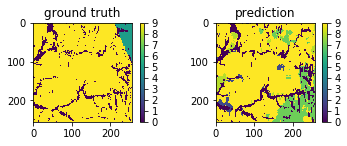

42


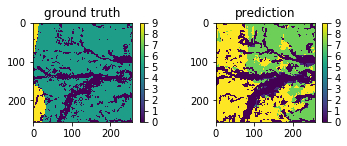

43


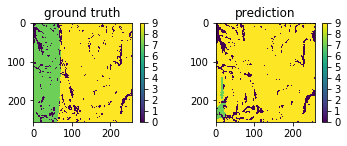

44


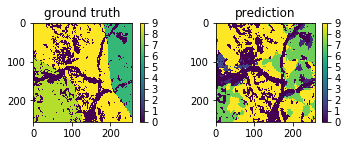

45


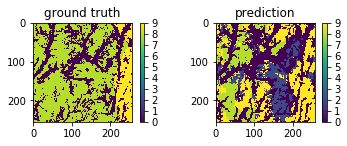

46


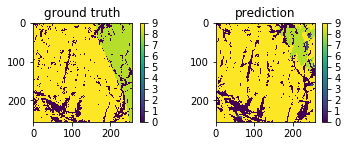

47


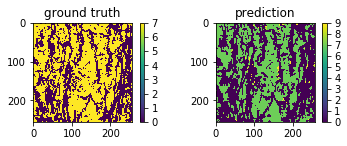

48


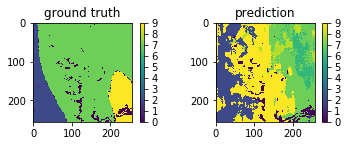

49


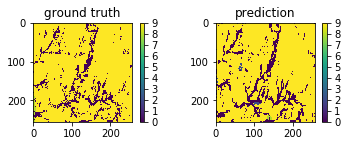

50


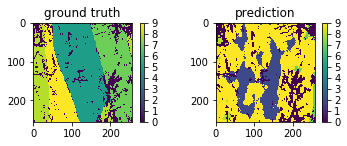

51


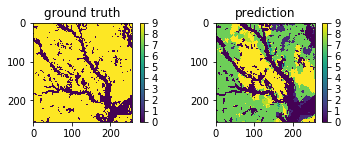

52


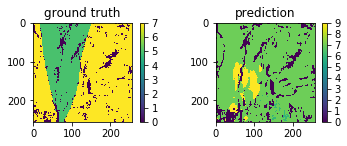

53


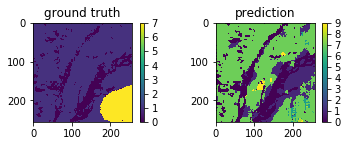

54


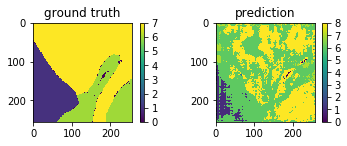

55


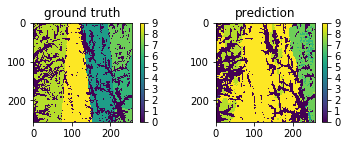

56


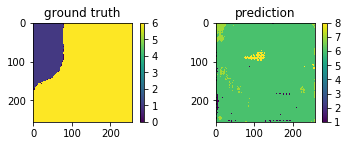

57


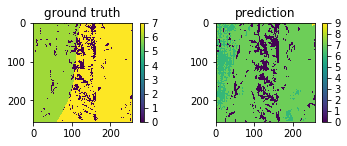

58


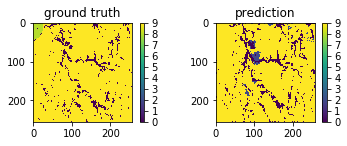

59


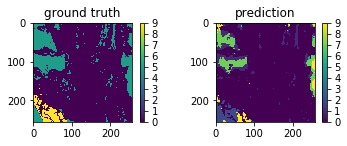

60


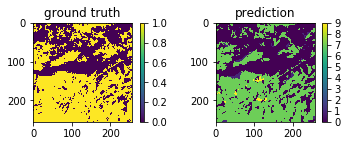

61


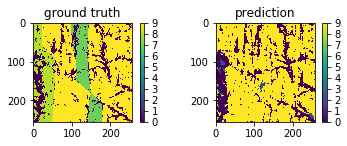

62


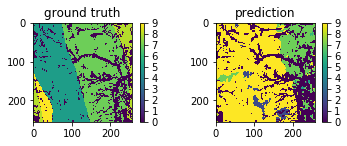

63


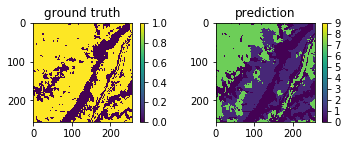

64


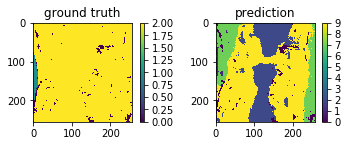

65


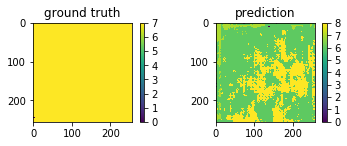

66


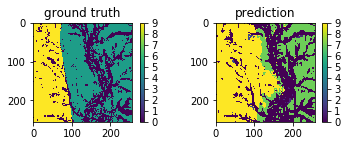

67


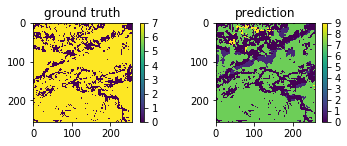

68


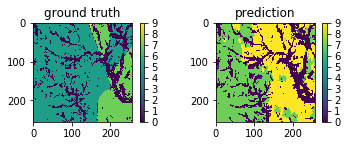

69


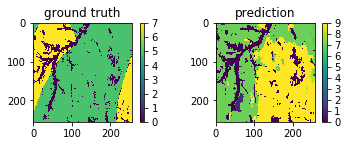

70


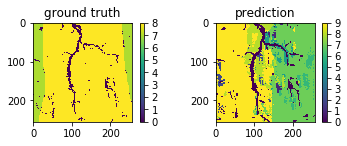

71


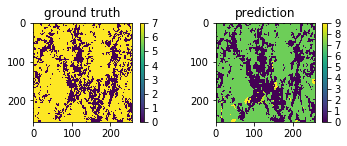

72


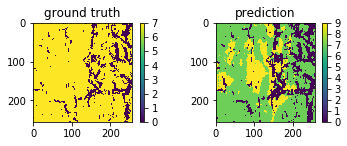

73


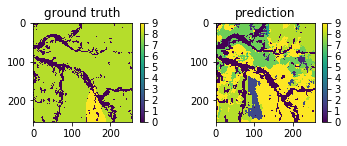

74


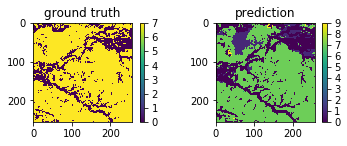

75


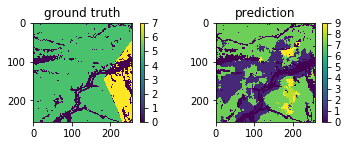

76


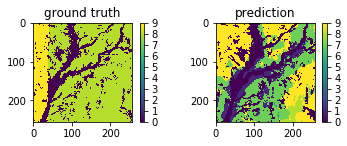

77


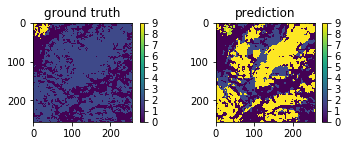

78


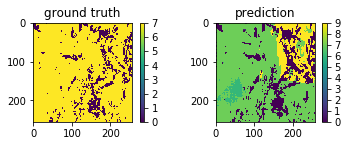

79


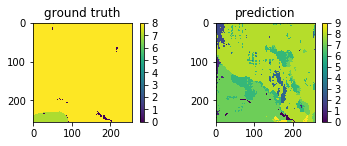

80


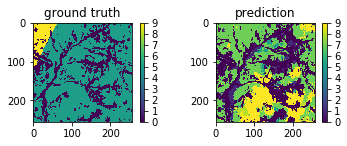

81


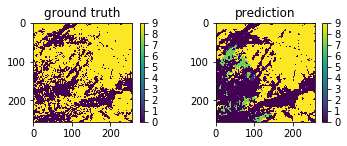

82


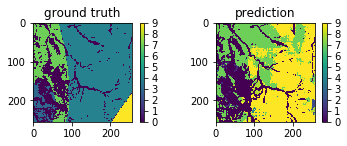

83


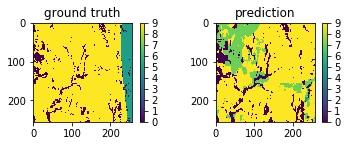

84


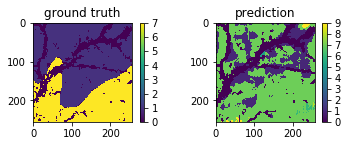

85


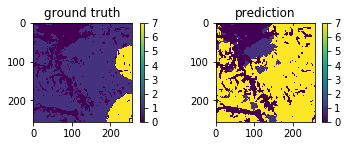

86


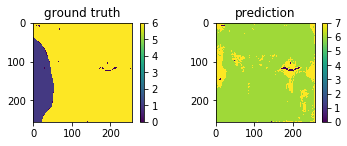

87


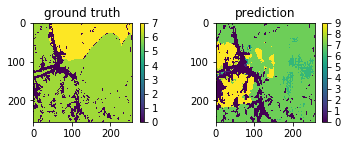

In [101]:
for i in range(88):
    print(i)
    plot_pg(i, s_preds, s_tst_true)

0


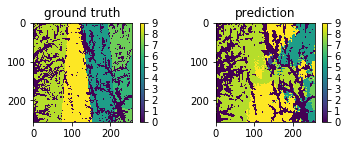

1


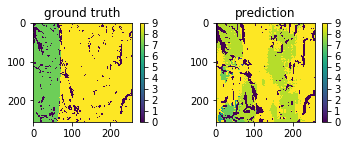

2


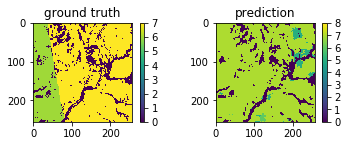

3


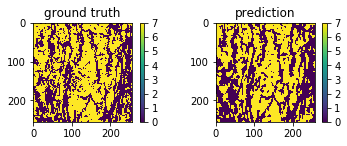

4


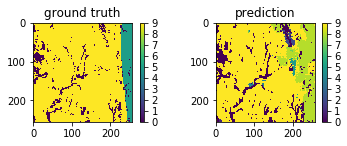

5


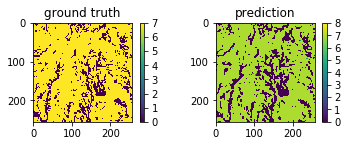

6


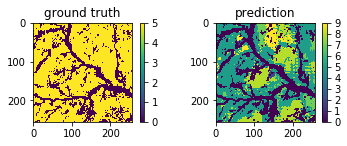

7


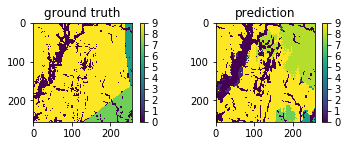

8


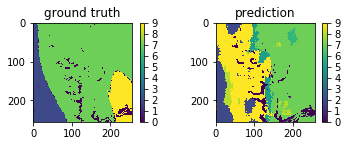

9


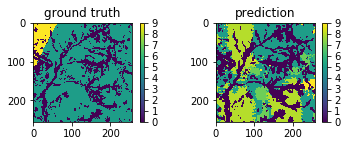

10


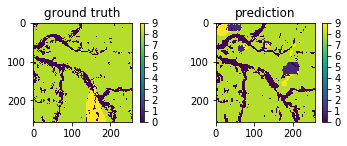

11


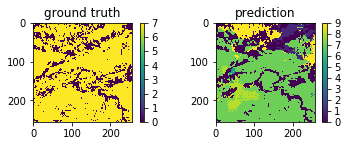

12


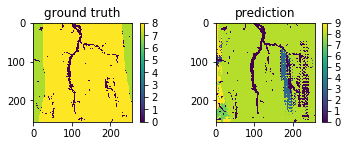

13


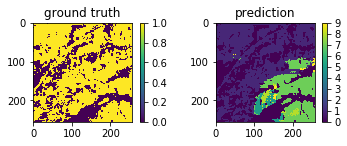

14


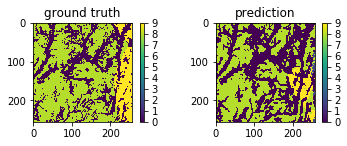

15


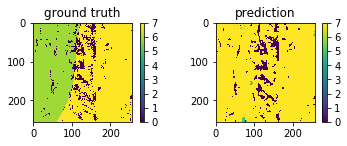

16


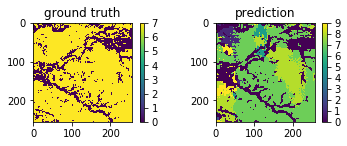

17


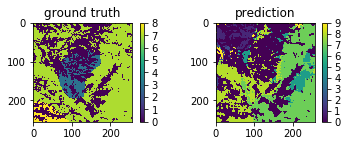

18


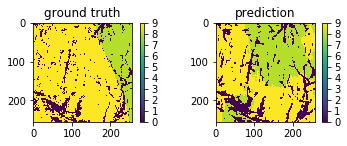

19


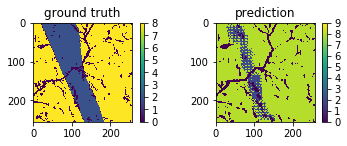

20


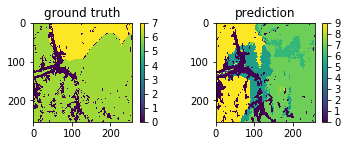

21


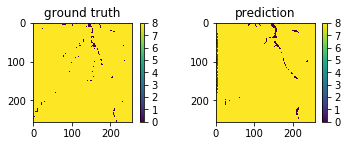

22


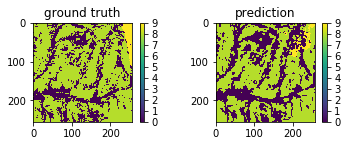

23


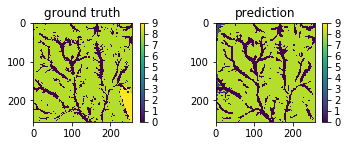

24


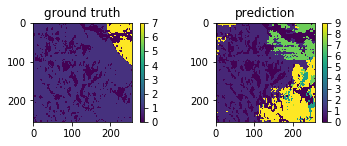

25


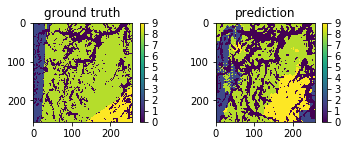

26


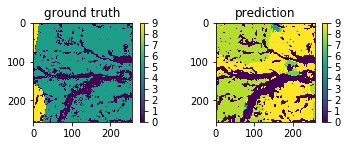

27


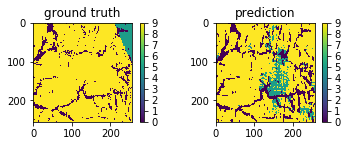

28


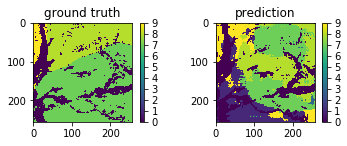

29


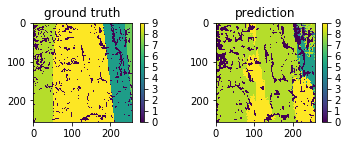

30


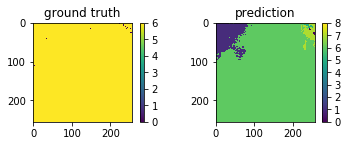

31


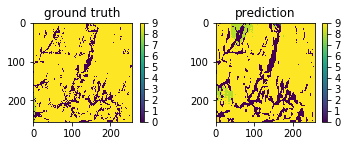

32


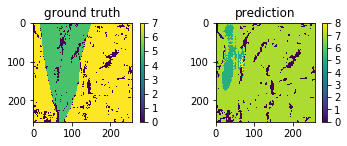

33


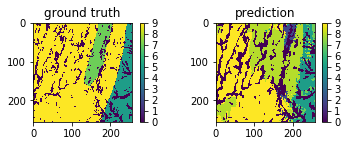

34


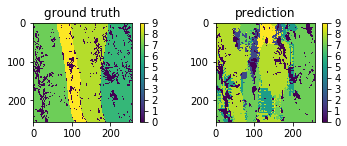

35


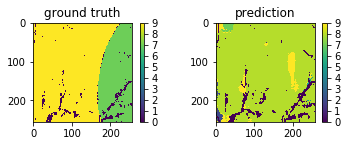

36


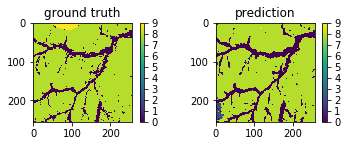

37


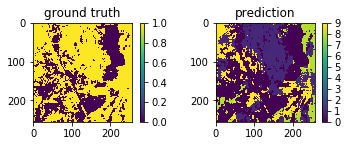

38


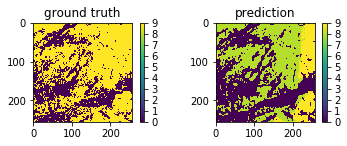

39


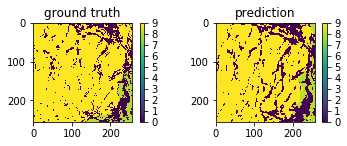

40


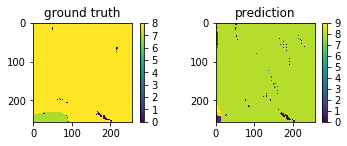

41


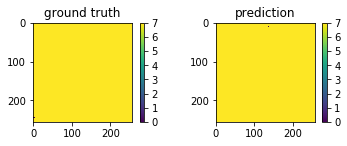

42


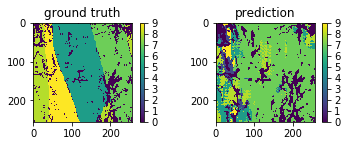

43


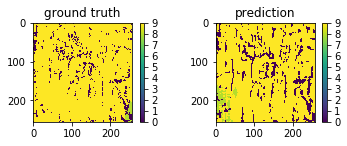

44


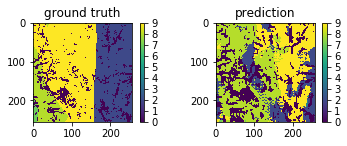

45


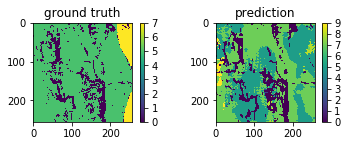

46


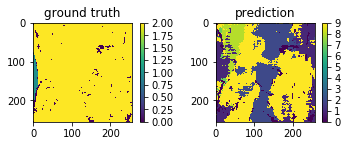

47


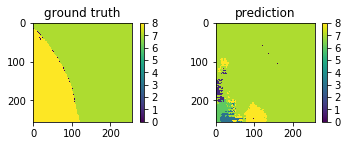

48


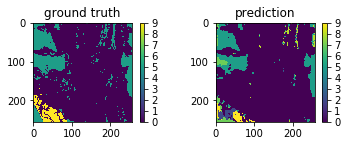

49


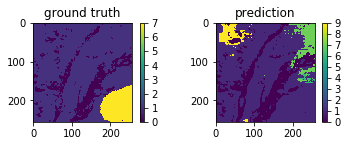

50


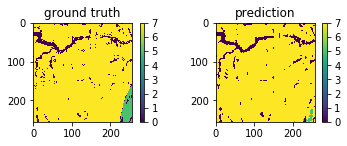

51


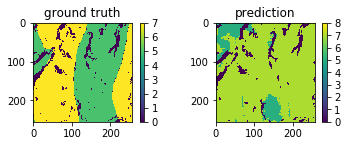

52


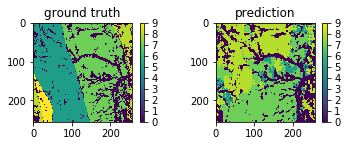

53


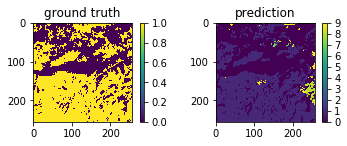

54


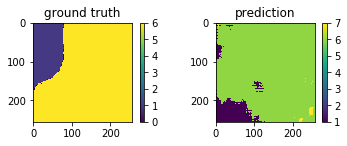

55


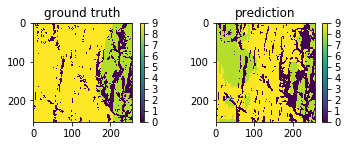

56


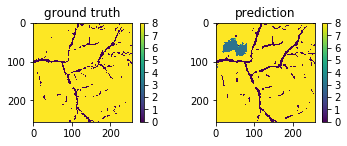

57


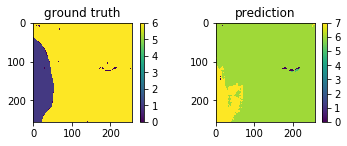

58


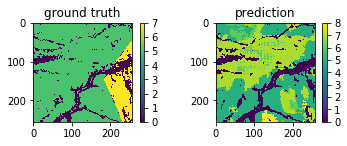

59


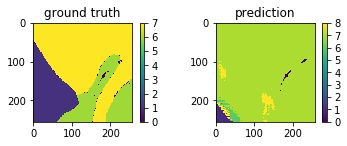

60


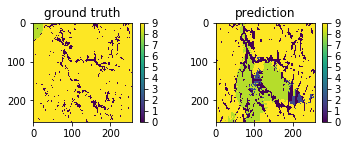

61


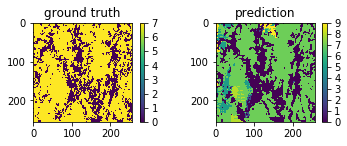

62


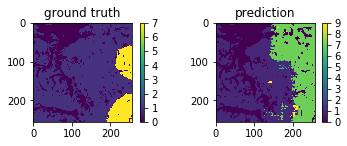

63


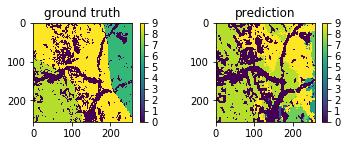

64


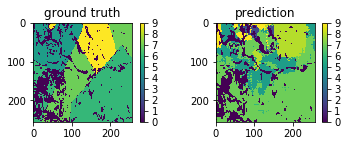

65


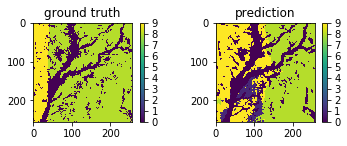

66


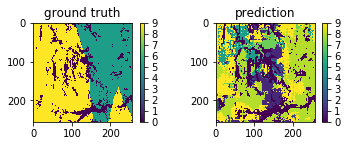

67


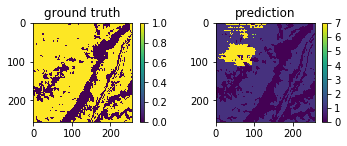

68


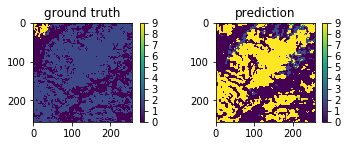

69


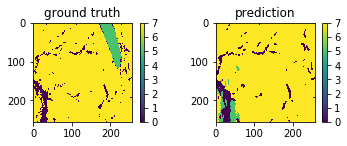

70


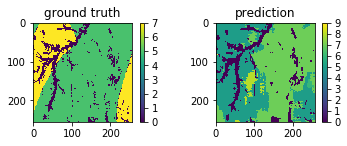

71


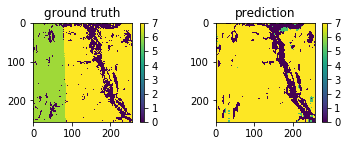

72


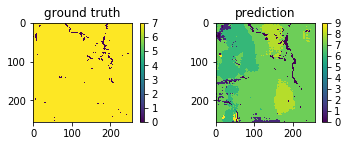

73


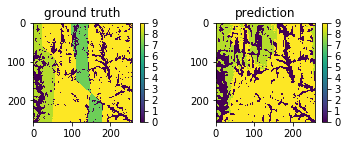

74


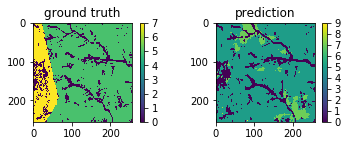

75


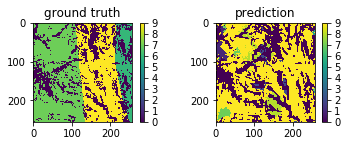

76


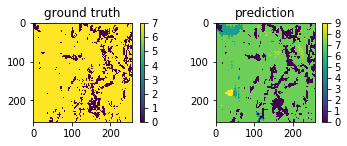

77


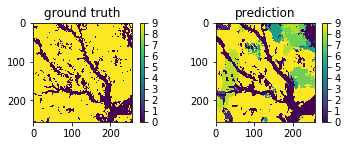

78


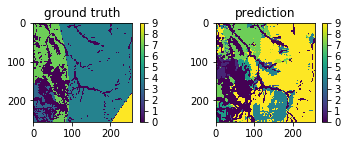

79


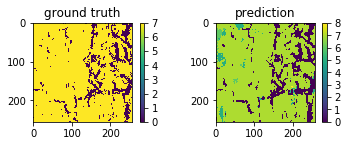

80


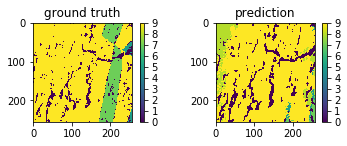

81


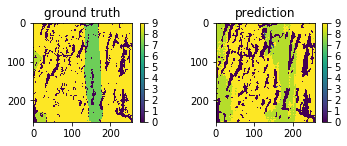

82


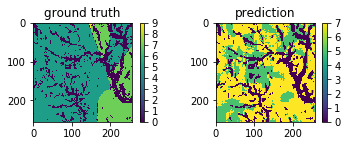

83


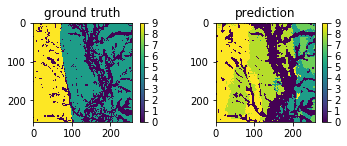

84


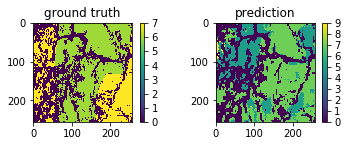

85


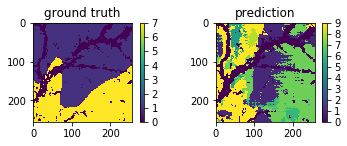

86


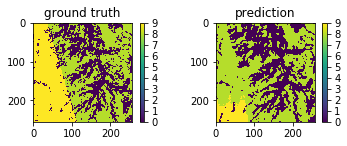

87


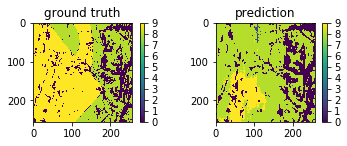

In [102]:
for i in range(88):
    print(i)
    plot_pg(i, sg_preds, sg_tst_true)

#### calculate the accuracy

In [105]:
def get_acc(preds, tst_true):
    acc_list = []
    for i in range(tst_true.shape[0]):
        tmp_pred = np.argmax(preds[i,:,:,:], axis=2)
        tmp_tst = np.argmax(tst_true[i,:,:,:], axis=2)
        acc_list.append(np.where(tmp_pred == tmp_tst)[0].shape[0]/(256*256))
    print('mean accuracy on test data is {0}, std is {1}'.format(np.mean(acc_list), np.std(acc_list)))
    print('max is {0}, min is {1}'.format(max(acc_list), min(acc_list)))

In [106]:
get_acc(s_preds, s_tst_true)

mean accuracy on test data is 0.536857778375799, std is 0.23867343077453448
max is 0.9150238037109375, min is 0.043548583984375


In [107]:
get_acc(sg_preds, sg_tst_true)

mean accuracy on test data is 0.6400335485284979, std is 0.20766724125986294
max is 0.999755859375, min is 0.0579071044921875


In [107]:
def get_acc_cls(tst_true, preds):
    acc_cls = np.zeros(tst_true.shape[-1])
    for idx in range(tst_true.shape[0]):
        tmp_pred = np.argmax(preds[idx,:,:,:], axis=2)
        tmp_tst = np.argmax(tst_true[idx,:,:,:], axis=2)
        for cls in range(tst_true.shape[-1]):
            tmp_pred_ = np.copy(tmp_pred)
            tmp_tst_ = np.copy(tmp_tst)
            tmp_pred_[np.where(tmp_pred_ != cls)] = -1
            tmp_tst_[np.where(tmp_tst_ != cls)] = -1
            acc_cls[cls] += np.where(tmp_pred_ == tmp_tst_)[0].shape[0]/(256**2)
    return acc_cls/tst_true.shape[0]

In [108]:
acc_cls_sg = get_acc_cls(tst_true, preds)

In [109]:
acc_cls_sg

array([0.9148563 , 0.96014716, 0.97340931, 0.99785874, 0.99421241,
       0.90761566, 0.95670145, 0.84699527, 0.87297249, 0.8552983 ])

In [72]:
acc_cls

array([0.91918651, 0.92944613, 0.9549975 , 0.99833315, 0.99337786,
       0.89815816, 0.93333106, 0.75344935, 0.88262159, 0.81081425])

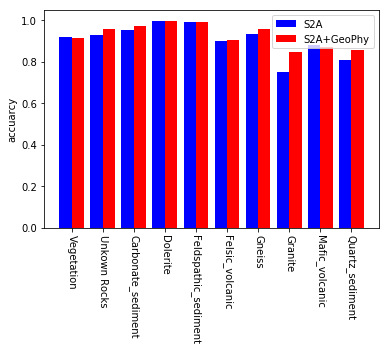

In [126]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']
ax = plt.subplot(111)
ax.bar(np.arange(10)-0.2, acc_cls, width=0.4, color='b', align='center', label='S2A')
ax.bar(np.arange(10)+0.2, acc_cls_sg, width=0.4, color='r', align='center', label='S2A+GeoPhy')
plt.xticks(np.arange(10), cls_names, rotation=270)
plt.ylabel('accuarcy')
plt.legend()